## First Order FeedForward Filter

Let's analyze the impulse response of a 1st order feedforward filter.

<function matplotlib.pyplot.show(close=None, block=None)>

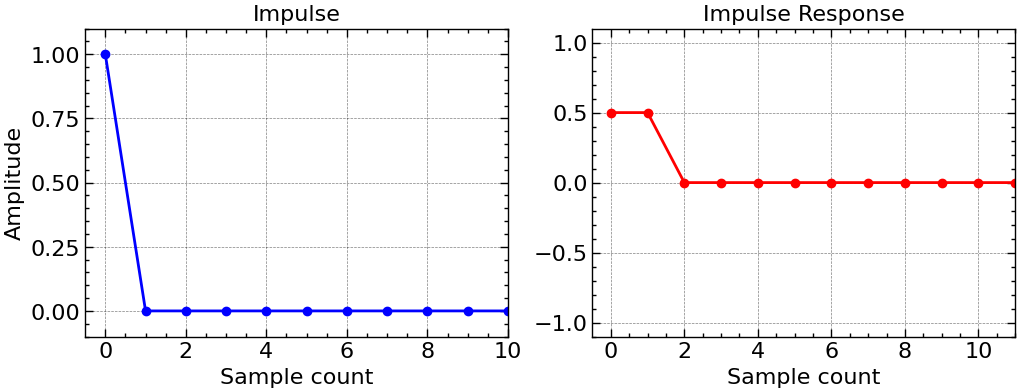

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# If the line below is giving you compiler errors, comment it out.
plt.style.use(['science', 'notebook', 'grid'])

frameSize = 2048

def feedForwardFilter(x, a0, a1):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = a0 * x[n] + a1 * x[n-1]
    return y


impulse = np.zeros(frameSize)
impulse[0] = 1;

impulseResponse = feedForwardFilter(impulse, 0.5, 0.5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(impulse, 'bo-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.5, 10)
ax.set_title("Impulse")

ax = axes[1]
ax.plot(impulseResponse, 'ro-')
ax.set_xlabel('Sample count')
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-0.5, 11)
ax.set_title("Impulse Response")

plt.show

We can then perform a Fourier transform on the impulse signal. This will give us an array of complex numbers which is stored in `spectrum`. Extracting the magnitudes of the complex numbers and plotting them will give us a frequency response plot, and extracting the angles will give us a phase response plot

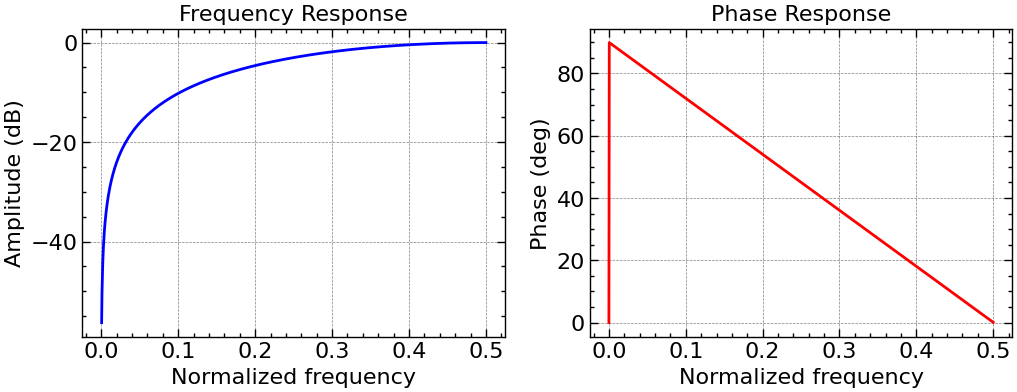

In [7]:
from scipy.fftpack import fft

spectrum = fft(feedForwardFilter(impulse, 0.5, -0.5))

x = np.linspace(0, 0.5, spectrum.size//2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
with np.errstate(divide='ignore'):
    y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
ax.plot(x, y, 'b')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(spectrum))[:spectrum.size//2]
ax.plot(x, y, 'r')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Phase (deg)')
ax.set_title("Phase Response")

plt.show()

Let's listen to what the impulse signal sounds like

In [ ]:
from IPython.display import Audio

sampleRate = 44100
audio = Audio(data=impulse, rate=sampleRate)
audio

Performing Fourier analysis (FFT) we can see the frequency representation of the impulse signal which reveals that all represetnable frequencies are present within this impulse signal

In [ ]:
from scipy.fftpack import fft

spectrum = fft(impulse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)
y = np.abs(spectrum)[:spectrum.size//2]
plt.plot(x, y)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
sincArray = np.linspace(-10, 10, frameSize)
sinc = np.sinc(sincArray)

plt.plot(impulse)
plt.plot(sinc)

plt.show()

In [ ]:
def feedForwardFilter(x, coeffA, coeffB):
    y = np.zeros(x.size)
    for n in range(1, x.size):
        y[n] = coeffA * x[n] + coeffB * x[n-1]
    return y

impulseResponse = feedForwardFilter(impulse, 0.5, 0.5);
plt.plot(impulseResponse, 'bo')
plt.xlim(1020, 1029)
plt.ylim(0, 1)
plt.show()

In [ ]:
spectrum = fft(impulseResponse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)
y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
noise = np.random.random(frameSize) - 0.5
noiseAudio = Audio(data=noise, rate=sampleRate)
noiseAudio

In [ ]:
noiseSpectrum = fft(feedForwardFilter(noise,0.5,0.5))

x = np.linspace(0, noiseSpectrum.size * sampleRate / frameSize / 2 , noiseSpectrum.size//2)
y = 20 * np.log10(np.abs(noiseSpectrum) / frameSize)[:noiseSpectrum.size//2]
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
sampleRate = 400
freq = 4
arr = np.linspace(0, freq, sampleRate)
combination = np.zeros(sampleRate)
for f in range(1, freq):
    combination += np.cos(2 * np.pi * f * arr)
combination /= freq
plt.plot(combination[:combination.size//2], 'o-')
#plt.xlim(0, 10)
plt.show()

In [ ]:
arr = np.arange(0, 200, 1)
sincNormalized = np.sinc(arr)
sincUnnormalized = np.sinc(arr/np.pi)
#plt.plot(sincUnnormalized, 'ro-', label='Unnormalized')
plt.plot(sincNormalized, 'bo-', label='Normalized')
#plt.xlim(0,50)
plt.show
plt.legend()

In [ ]:
sincFft = fft(sincNormalized)
UnsincFft = fft(sincUnnormalized)

x1 = np.arange(0, sincFft.size, 1)
y1 = np.abs(sincFft)
plt.plot(x1, y1)

x2 = np.arange(0, UnsincFft.size, 1)
y2 = np.abs(UnsincFft)
plt.plot(x2, y2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
arr = np.linspace(-200,200, 400) 
sinc = np.sinc(arr)

plt.plot(sinc)
sincFft = fft(sinc)
x = np.arange(0, sincFft.size, 1)
y = np.abs(sincFft)
plt.plot(x,y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.signal import firwin, freqz

freq=2;
sampleRate=100;
array = np.arange(0, 1, 1/sampleRate)

sine = np.sin(2 * np.pi * freq * array) + np.sin(2 * np.pi * freq * 3 * array)

sinSpectrum = fftpack.fft(sine)

# plt.plot(np.abs(sinSpectrum)*2/sampleRate)
# plt.plot(sine)
# plt.show()

coeff = firwin(2, 0.5)
w1, h1 = freqz(coeff)

x = w1 * 22050 / np.pi
y = 20*np.log10(np.abs(h1))
plt.plot(x[1:], y[1:], 'b')
plt.xscale('log')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()